In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#assign the data
x = train.drop(['label'], axis=1)
y = train['label']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#normalization
x_train = x_train/255
x_test = x_test/255

#reshaping
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)


test_final = test/255
test_final = test_final.values.reshape(-1,28,28,1)

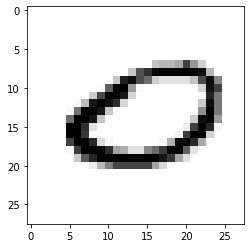

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [97]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9], cmap = plt.cm.binary)
plt.show()
print(x_train[3])


In [98]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
282/282 [==============================] - 1s 1ms/step - loss: 0.4971 - accuracy: 0.8629
Epoch 2/20
282/282 [==============================] - 0s 980us/step - loss: 0.2061 - accuracy: 0.9389
Epoch 3/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.9553
Epoch 4/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9664
Epoch 5/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9732
Epoch 6/20
282/282 [==============================] - 0s 994us/step - loss: 0.0677 - accuracy: 0.9800
Epoch 7/20
282/282 [==============================] - 0s 994us/step - loss: 0.0544 - accuracy: 0.9846
Epoch 8/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9870
Epoch 9/20
282/282 [==============================] - 0s 987us/step - loss: 0.0335 - accuracy: 0.9905
Epoch 10/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy

In [99]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

434/434 [==============================] - 0s 569us/step - loss: 0.1585 - accuracy: 0.9674
0.15851683914661407 0.9673881530761719


In [100]:
model_final = tf.keras.models.Sequential()
model_final.add(tf.keras.layers.Flatten())
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model_final.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
model_final.fit(x_train, y_train, epochs=20, batch_size=100)

preds = model_final.predict(test_final)





Epoch 1/20
282/282 [==============================] - 1s 1ms/step - loss: 0.4809 - accuracy: 0.8598
Epoch 2/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9468
Epoch 3/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9645
Epoch 4/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9723
Epoch 5/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9798
Epoch 6/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 7/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 8/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 9/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9928
Epoch 10/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9947

In [101]:
preds = np.argmax(preds,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(preds)+1)), 'Label': preds})
my_submission.to_csv('your_sub.csv', index=False)


